In [3]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [4]:
#drop rows with missing values
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print('raw_data_count: '  + str(raw_data_count))
print('cleaned_data_count: '  + str(cleaned_data_count))

raw_data_count: 173
cleaned_data_count: 172


## Scatter Plots

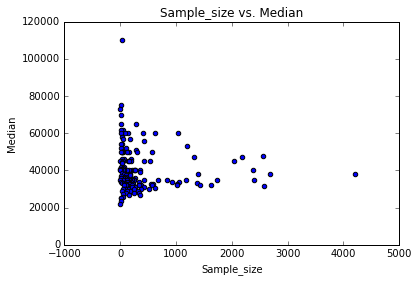

In [5]:
## Some Scatter Plots of various relations
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')

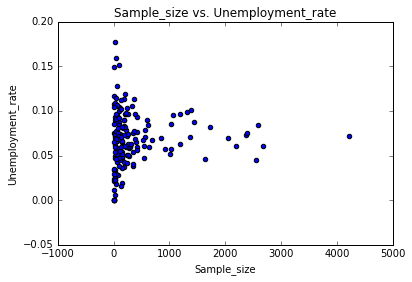

In [6]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')

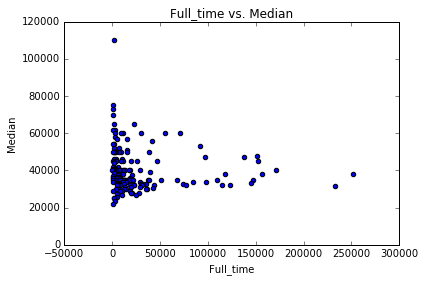

In [7]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')

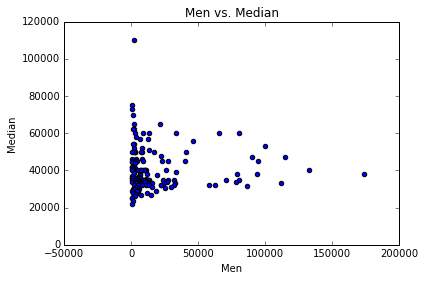

In [8]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

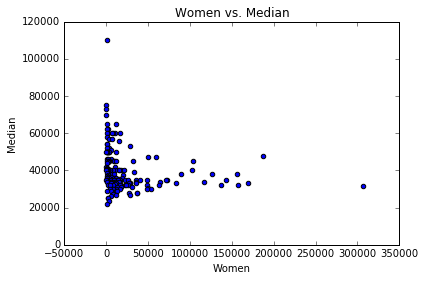

In [9]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')

Finding:
-  Most of the data points in this dataset are for sample sizes of less than 1000. The smaller sample sizes represent median incomes throughout the range. As sample sizes increase past 1000, there are no data points showing median incomes above roughly 50000 for median income. The higher incomes seem to be concentrated among the less common college majors.

## Histograms

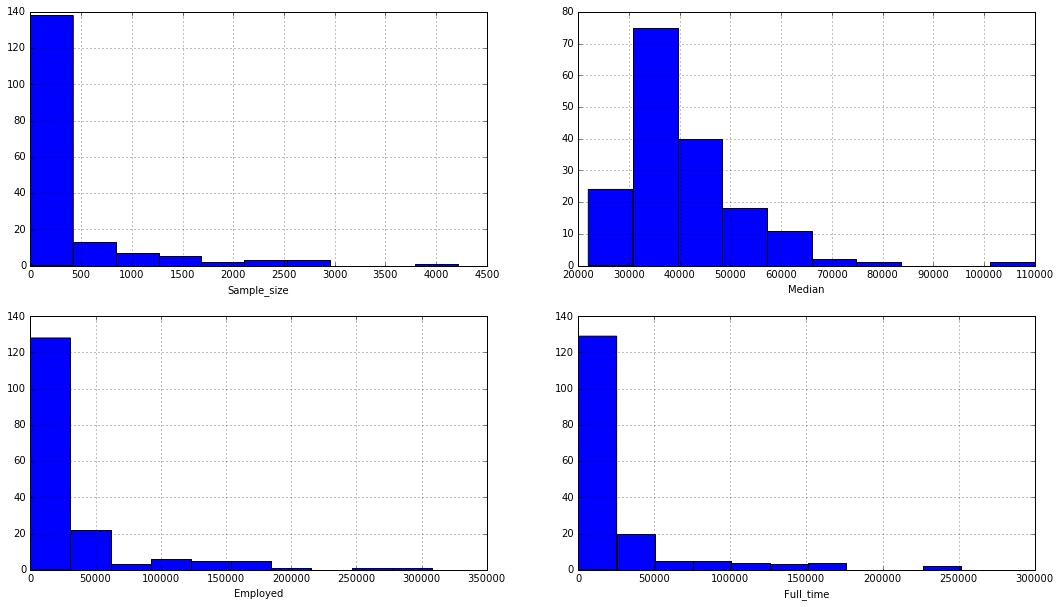

In [10]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for r in range(0,4):
    ax = fig.add_subplot(2,2,r+1)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])

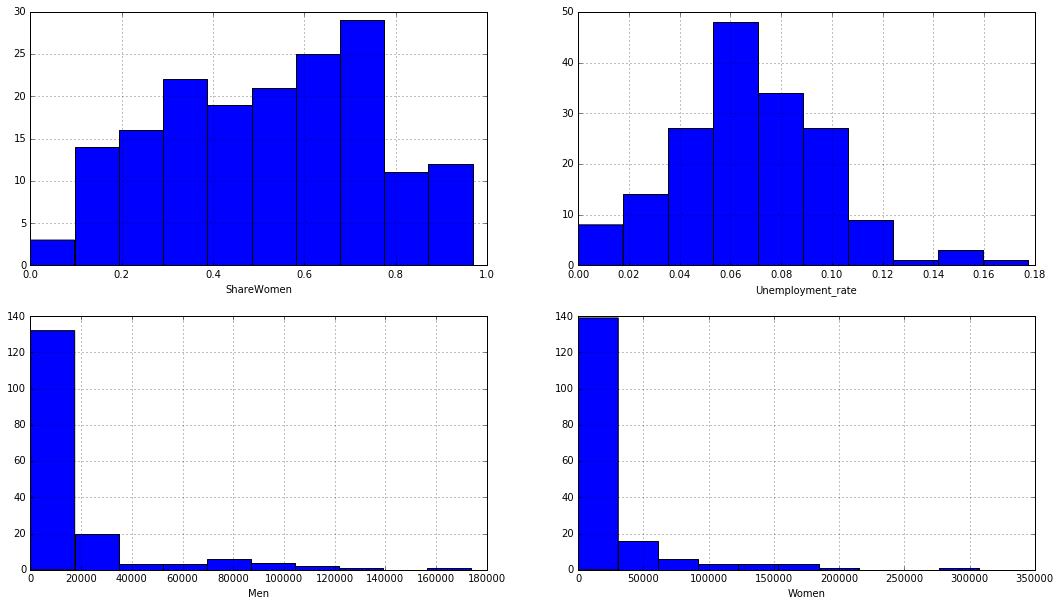

In [11]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for r in range(4,8):
    ax = fig.add_subplot(2,2,r-3)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])

## Scatter Matrix Plot

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fe5a0aac8>,
      dtype=object)

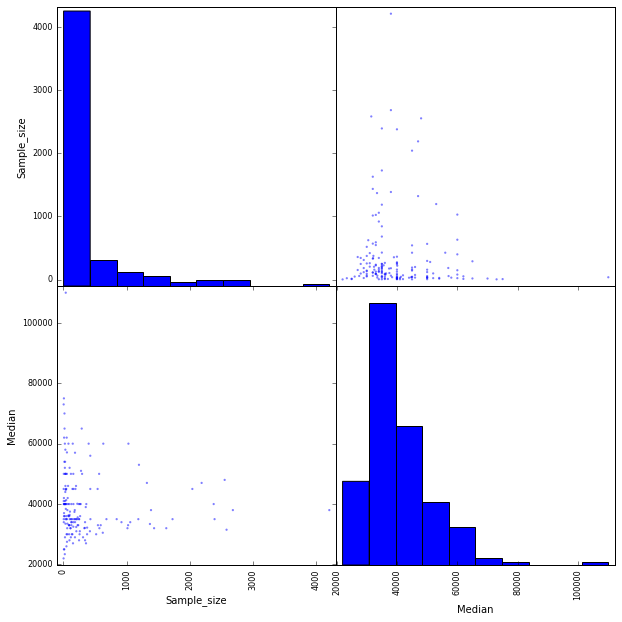

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']],
              figsize=(10,10))

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fe5b6eb00>,
      dtype=object)

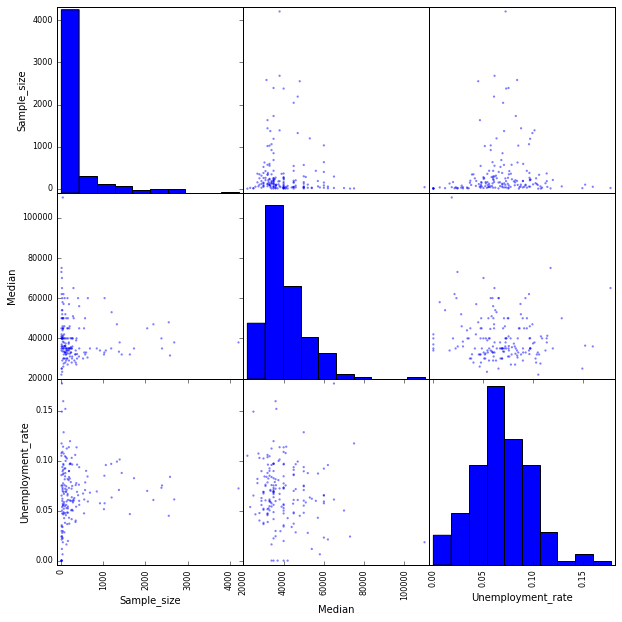

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']],
              figsize=(10,10))

#### Bar plots to compare the percentages of women (ShareWomen) from the 10 highest paying majors and from the 10 lowest paying majors.
The dataset is sorted by rank. From highest median paid to lowest median paid

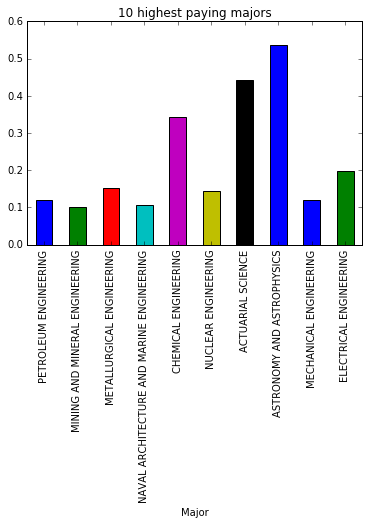

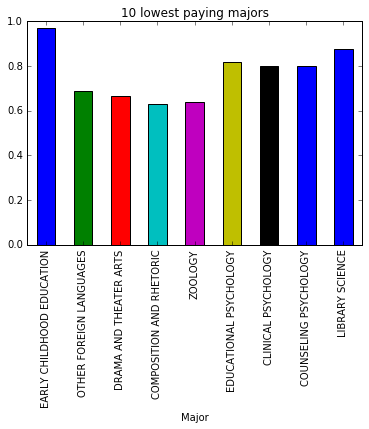

In [14]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False, title = '10 highest paying majors')
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False, title = '10 lowest paying majors')

In [16]:
import numpy as np
tm = recent_grads.pivot_table(index = 'Major_category', values = ['Men','Women'],aggfunc = np.sum)
tm

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


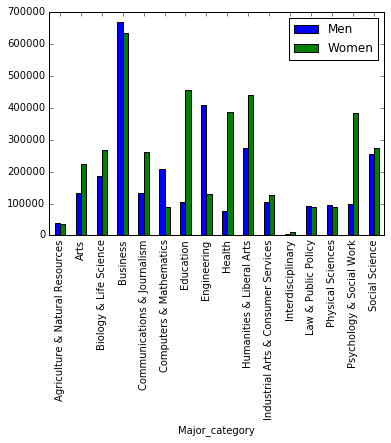

In [17]:
tm.plot.bar(x = tm.index, y= ['Men','Women'])

## Box plot to explore the distributions of median salaries and unemployment rate.

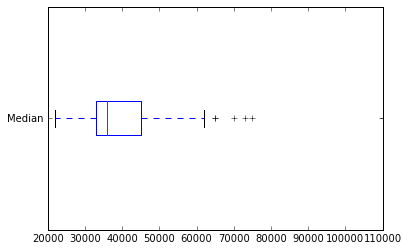

In [18]:
recent_grads['Median'].plot.box(vert=False)

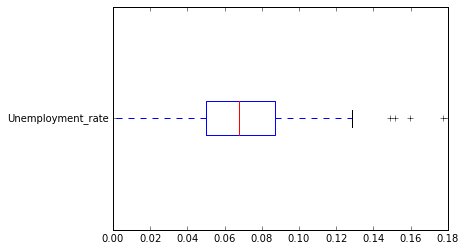

In [19]:
recent_grads['Unemployment_rate'].plot.box(vert=False)

Findings:
-  Majority of Recent Graduated Students are making around 35000 to 50000.
-  The range of Umemployment rate for Recent Graduated Students is bettween 0 to 12 percent.
-  The median Unemployment rate is 7 percent.
-  The bottom 25 percent and top 25 percent are bettween 0 to 4 percent and 8 percent to 13 percent respectively.
-  Majority of Unemployment are bettween 5 percent to 10 percent.